# Assignment 3 

Project Name: COSC102 - Assignment 3 – Machine Learning Portfolio: Comparing the Performance of Machine Learning Approaches for Activity Classification <br>
Authors: - <br>
Email: - <br>
Date: - 12/08/24<br>

BLOCK OF INFO EXPLAINING THE PROJECT AND WHAT WE WILL BE DOING.

In [652]:
# Import statements

import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import f1_score, recall_score, precision_score
from matplotlib.colors import ListedColormap
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error


## Load data

We will begin by loading up our data sets and running through the beginning checklist of any data science project. This includes<br>
inspecting our data sets, checking for missing values and fixing any preliminary probelms we might see before moving onto the steps.

In [16]:
# function to load csv files as pandas dataframe

def load_data(csv, header, col_names):
    """
    Takes a csv's file path in the form of a string and 
    returns a pandas dataframe of the csv, if the dataset
    has no column names, it will append a passed in list
    of column names, otherwise it will leave the dataset 
    as is.
    Params:
    String - csv, string of the file path for a given csv
    header - Paramater deciding if the first row of the csv 
    are the column names or not, pass "infer" if your data
    set has column names and "None" if it doesn't
    names - A list of column names to assign to the dataset
    only if the headers parameter is "None", pass None for
    this parameter if your dataset already has column names.
    Returns:
    Pandas dataframe of a csv file
    """
    return pd.read_csv(csv, header=header, names=col_names)    

In [18]:
# File paths for our csv data sets
IMU_DATA = "./a3_imu_data.csv"
ACTIVITY_DATA = "./a3_activity_annotations.csv"

Looking at the raw csv files outside of the project, we noticed that the imu data set has no column names, we are going to need<br>
to assign the data set column names so that it is easier/possible to work with. The names chosen were taken from the assignments <br>
task sheet. The activity data already had column names assigned and accurate, so no work was neccersary on them.

In [21]:
# Initialing our datasets as pandas dataframes and assigning column names

# List of column namesColumn 
imu_col_names = ["timestamp", "x_axis_accel", "y_axis_accel", "z_axis_accel", "x_axis_gyro", "y_axis_gyro", "z_axis_gyro"]

# Loading our csv files, the imu set has no column names so we are passing in a list of names to add
# The activity dataset comes with names so we leave it as it is and pass in "None" for column names
imu_data_raw = load_data(IMU_DATA, None, imu_col_names)
activity_data_raw = load_data(ACTIVITY_DATA, "infer", None)

That should do the job, now let's look and see what our datasets look like, check for missing values, and plot a basic visualization<br> of the data sets.

In [24]:
# Function to check for any null values

def check_for_null(dataset, name):
    """
    Takes a pandas dataframe and the name of the dataframe as a string and
    checks if there are any missing values in all columns, prints out the 
    results
    Params:
    dataset - A pandas dataframe 
    name - A string for the name of your dataframe
    """
    print(f"{name}'s NULL values \n")
    for col in dataset.columns:
        print(f"{dataset[col].name} has {dataset[col].isnull().sum()} null values")

In [25]:
# Function to display a basic plot of our data

def plot_dataframe(X, y, title):
    """
    Takes an X and y from a pandas dataseries as well as the title in the form of a string. 
    The X value should be a single column of values from a pandas dataframe, the y values
    can contain as many columns as you like.
    Params:
    X - Pandas series containing the x value for our plot
    y - Pandas series containing the y value(s) for our plot
    title - String containing the desired title for our plot
    """
    # Create a figure
    fig, ax = plt.subplots(figsize=(18,10))

    # for every column in the y set, get the column name and append it to a list of labels
    
    labels=[i for i in y.columns]

    # Plot the data and add basic quality of life features
    plt.plot(X, y, label= labels)
    ax.set_xlabel(X.name, fontsize=18)
    ax.ticklabel_format(useOffset=False, style='plain')
    ax.set_ylabel("Values", fontsize=18)
    ax.set_title(title, fontsize=22)
    plt.grid()
    plt.legend()

## Visualize the datasets and inspect for alignment errors

### IMU Dataset Inspection

In [30]:
# Check for null values
check_for_null(imu_data_raw, "IMU DATA")


IMU DATA's NULL values 

timestamp has 0 null values
x_axis_accel has 0 null values
y_axis_accel has 0 null values
z_axis_accel has 0 null values
x_axis_gyro has 0 null values
y_axis_gyro has 0 null values
z_axis_gyro has 0 null values


In [32]:
# Get basic information
imu_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71242 entries, 0 to 71241
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   timestamp     71242 non-null  int64
 1   x_axis_accel  71242 non-null  int64
 2   y_axis_accel  71242 non-null  int64
 3   z_axis_accel  71242 non-null  int64
 4   x_axis_gyro   71242 non-null  int64
 5   y_axis_gyro   71242 non-null  int64
 6   z_axis_gyro   71242 non-null  int64
dtypes: int64(7)
memory usage: 3.8 MB


In [34]:
# Visualise the dataframe
imu_data_raw.head()

,timestamp,x_axis_accel,y_axis_accel,z_axis_accel,x_axis_gyro,y_axis_gyro,z_axis_gyro
0,1598240213,-2402,1710,-380,-1413,-362,223
1,1598240213,-1880,1688,-420,-1469,-597,-23
2,1598240213,-1558,1568,-606,-1535,-872,-195
3,1598240213,-1154,1732,-654,-1293,-976,-335
4,1598240213,-452,2084,-754,-719,-940,-214


From above we can see that that our timestamps are calculated as unix time stamps, we might want to convert these to seconds before we plot <br>
the series to avoid some unpretty looking axis values. This will also come in handy later on in this project when aligning the two dataset's. <br>


In [37]:
# Creating a function specifically to convert unix time stamps to seconds

def convert_time_series(data_series):
    """
    Converts a series consisting of unix timestamps to seconds and returns the series
    Params:
    data_series - a pandas dataseries of unix timestamps
    Returns:
    A time series in seconds
    """
    # Assign the timestamp to a variable
    time = data_series

    # Create a starting time outside of our loop so that it doesn't change value
    # as we iterate through each value of the series
    start_time = time[0]
    
    # Iterate through every value of the timestamp column
    for row in time:
        # Get the time in the timstamp column, minus the first value, and plus 1,
        # this will essentially count seconds from the start of the dataseries
        calc_seconds = row - start_time + 1
        # Take the value calculated above and replace it in our time column, this
        # will remove the unix timestamp from the column and replace it with the
        # difference in seconds since the start of the dataseries
        time = time.replace(to_replace=row, value=calc_seconds)
    
    # Add the new time series to our dataframe
    return time

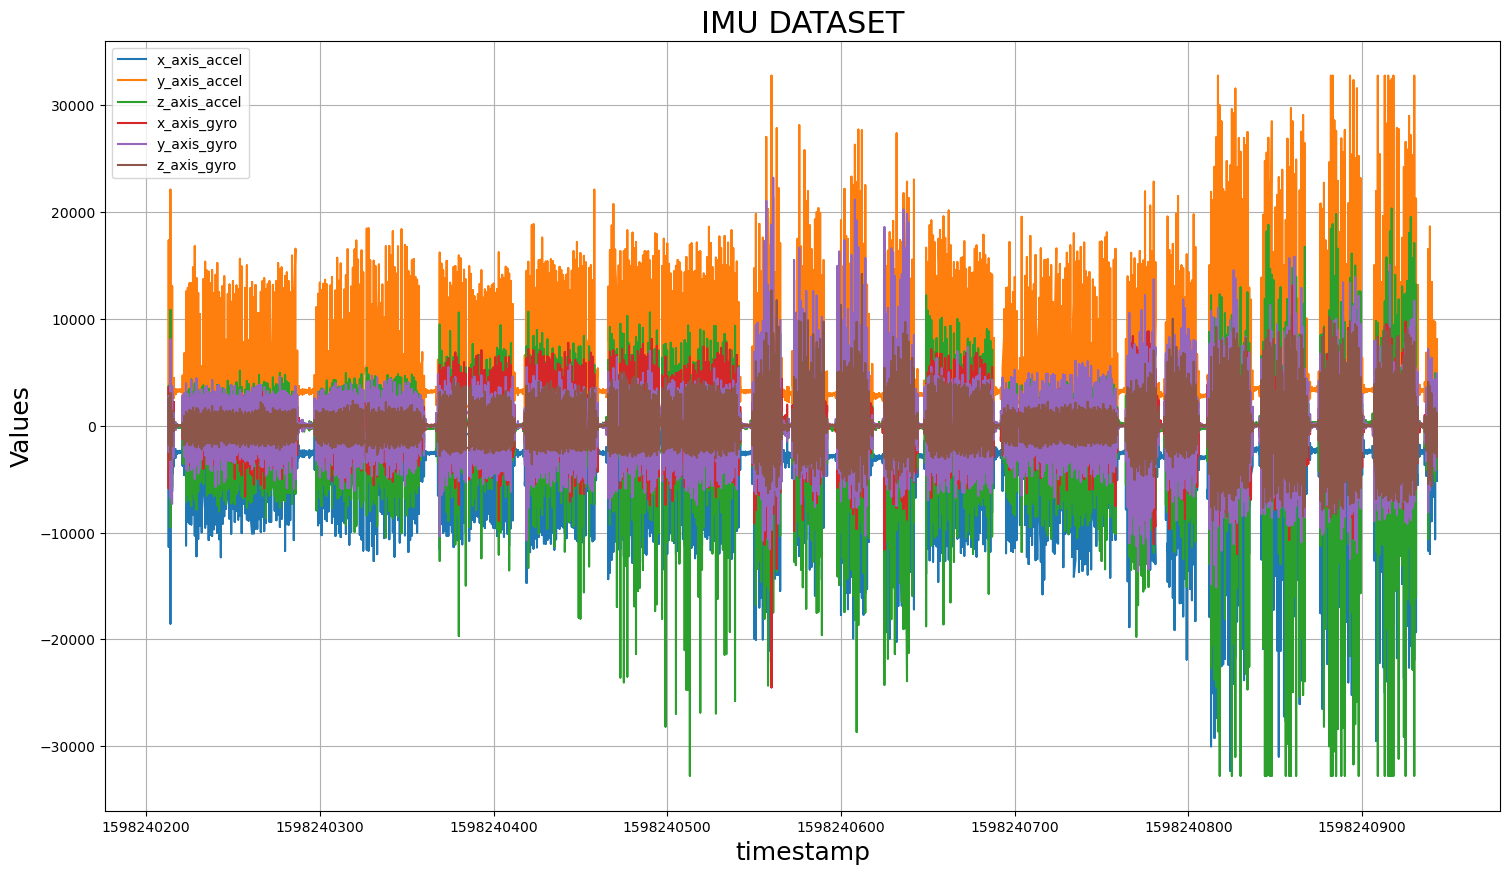

In [39]:
# Cal the plot_dataframe function passing it our dataframes timestamp column for the X axis and every other column for our y values

imu_data_raw["time (seconds)"] = convert_time_series(imu_data_raw["timestamp"])

plot_dataframe(imu_data_raw["timestamp"],  imu_data_raw.drop(["timestamp", "time (seconds)"], axis=1), "IMU DATASET")

By the looks of it, our IMU dataset looks pretty straight forward:
- There are no null values
- We were able to correctly name the columns
- There are 71,000 samples of data
- All data values are integers
- The timestamp are unix time stamps
- We have created a new column value "time (seconds)" <br>
that tracks the time from the start of the data to <br>
any given point in seconds
<br>

One thing that stands out when visualizing this dataset is the start and end points of the data don't really match any other sections of the set, depending on <br>
what our activity data looks like, we may have to slice out these points to align the data more accuratly. Another thing of note is the different sections of<br>
of the dataset. There appears to be 17 different movement sections with 4 or 5 different movement patterns, another thing to look out for when we are aligning <br>
our data.
Let's move onto our activity data set now and see what are working with and what we might have to fix

### Activity Dataset Inpection

In [42]:
check_for_null(activity_data_raw, "ACTIVITY DATA")

ACTIVITY DATA's NULL values 

image has 0 null values
xmin has 0 null values
ymin has 0 null values
xmax has 0 null values
ymax has 0 null values
label has 0 null values


In [43]:
activity_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   image   34 non-null     object 
 1   xmin    34 non-null     float64
 2   ymin    34 non-null     float64
 3   xmax    34 non-null     float64
 4   ymax    34 non-null     float64
 5   label   34 non-null     object 
dtypes: float64(4), object(2)
memory usage: 1.7+ KB


In [44]:
activity_data_raw.head()

,image,xmin,ymin,xmax,ymax,label
0,a3.mp4#t=0.0,868.943127,417.331032,919.139168,557.535077,Walking
1,a3.mp4#t=66.2,854.251592,330.392238,926.484935,564.882015,Standing
2,a3.mp4#t=75.4,855.475924,324.882034,929.545709,561.820810,Walking
3,a3.mp4#t=139.333333,849.966598,321.208565,928.933599,563.045281,Standing
4,a3.mp4#t=146.733333,855.475924,327.331004,935.667145,553.249400,Jogging


Similiarly like with the IMU dataset our Activity Dataset has a "not so straight forward" timestamp series, this is under the column named "image" and appears to <br>
be in the form of a string. We do need the time values from this set so that we can align our datasets later on. Fortunately it should be easy to create a clean<br>
set of data for time series from these values. Moving onto the other non-number series of data in the dataset, the labels. These will be our targets/labels/y-series<br>
that we will use to train our classifiers on later on, the rest of the data we don't need for this project. Let's fix our time series and then figure out what to plot.

In [46]:
# Create a list to append our new time values too
time = []

# Iterate through every row of the "image" column
for row in activity_data_raw.image:
    # Split the row on the "=" and append only the second element as this is float
    # value that appears after the equals and not the a3.mp4# that appears before.
    time.append(float(row.split("=")[1]))

# Add the new series to our dataframe
activity_data_raw["time"] = time
activity_data_raw.head()

,image,xmin,ymin,xmax,ymax,label,time
0,a3.mp4#t=0.0,868.943127,417.331032,919.139168,557.535077,Walking,0.000000
1,a3.mp4#t=66.2,854.251592,330.392238,926.484935,564.882015,Standing,66.200000
2,a3.mp4#t=75.4,855.475924,324.882034,929.545709,561.820810,Walking,75.400000
3,a3.mp4#t=139.333333,849.966598,321.208565,928.933599,563.045281,Standing,139.333333
4,a3.mp4#t=146.733333,855.475924,327.331004,935.667145,553.249400,Jogging,146.733333


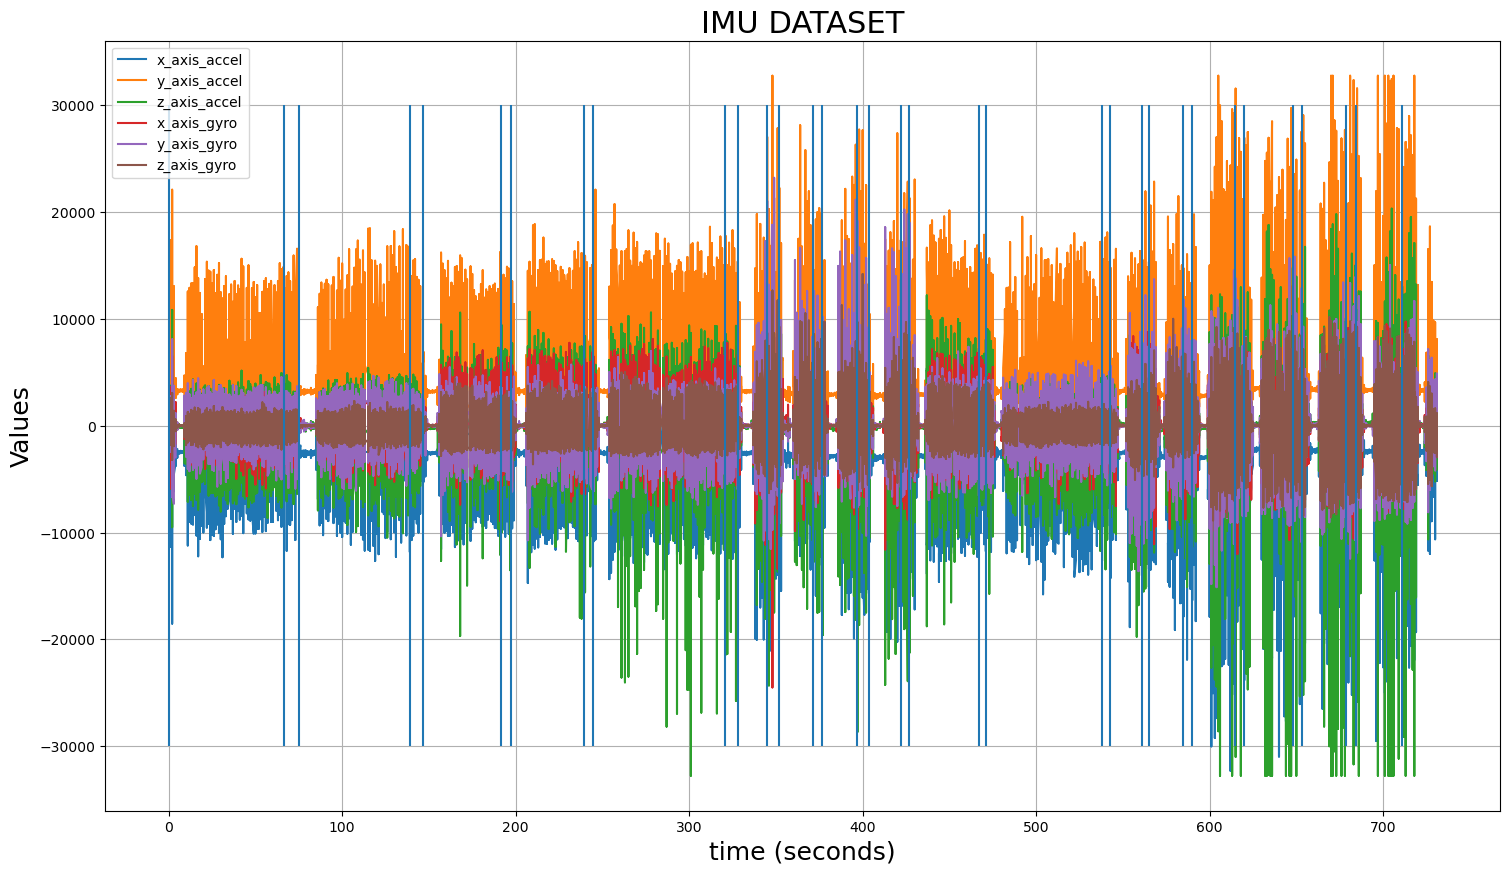

In [47]:
# Re-plot our IMU data and overlay the time points inthe activity dataset where the labels change
plot_dataframe(imu_data_raw["time (seconds)"],  imu_data_raw.drop(["timestamp", "time (seconds)"], axis=1), "IMU DATASET")

# Add vertical lines for every activity change
plt.vlines(activity_data_raw["time"], -30000,30000)
plt.show()

In [48]:
# Printing the first value of our labels series
activity_data_raw.label[0]

'Walking'

Ok, so from the above plot we can see that our data is not aligned, judging by the small gaps between the vertical lines, and the fact that the first activity label is walking,<br>
the small blip of imu data at the start needs to be removed and we need our imu dataset to start a little later where the first section of consistancy begins. This should <br>
solve the alignment problem of our datasets, we also need to remove the last section of the imu data after the last section of consistancy. To find what values we need to slice <br>
out, we can use some trial and error passing in sliced sections of our imu dataset to our plot function and finding the exact values we need. Afterwards we can reassign our data<br>
frame without the uneeded rows of data and then re-adjust the time series again.

## Align and combined the activity and imu datasets using the activity transitions

In [51]:
# Slice up our imu data to remove unwanted start and end data
imu_processed = imu_data_raw.drop(["time (seconds)"], axis=1)[900:70000]

# reset the inde on the dataframe and drop the old index column
imu_processed = imu_processed.reset_index().drop("index", axis=1)
imu_processed.head()

,timestamp,x_axis_accel,y_axis_accel,z_axis_accel,x_axis_gyro,y_axis_gyro,z_axis_gyro
0,1598240222,-2602,2848,-3576,-413,-51,-205
1,1598240222,-2850,2936,-3502,-315,-1,-123
2,1598240222,-3172,2890,-3450,-248,114,-17
3,1598240222,-3340,2772,-3240,-236,273,60
4,1598240222,-3346,2566,-3114,-287,469,83


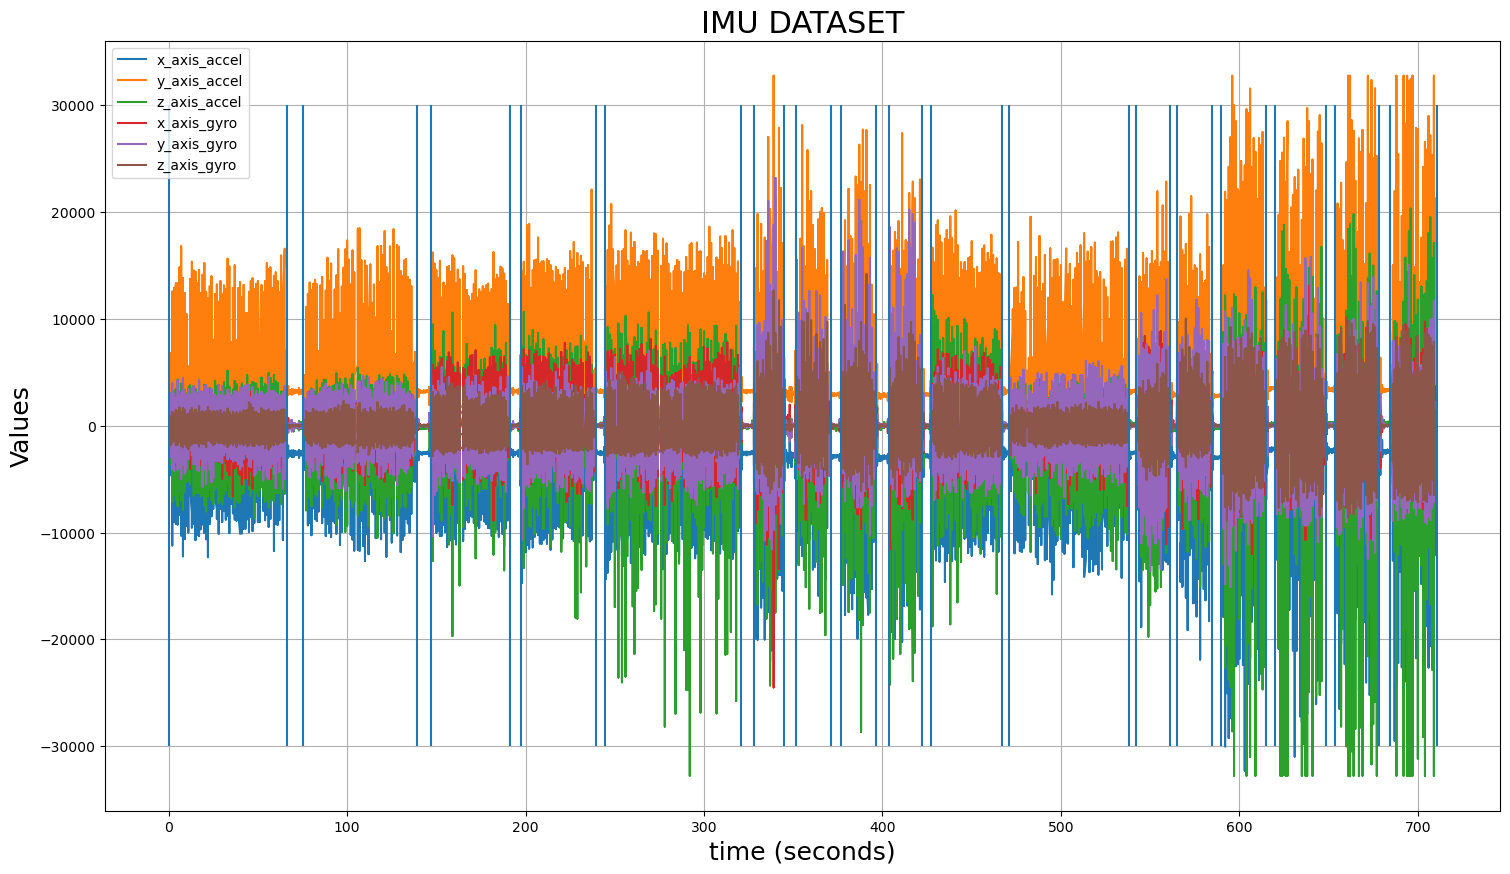

In [52]:
# Re-call the unix timestamp converter to re-adjust the time values
imu_processed["time (seconds)"] = convert_time_series(imu_processed["timestamp"])

plot_dataframe(imu_processed["time (seconds)"],  imu_processed.drop(["timestamp", "time (seconds)"], axis=1), "IMU DATASET")

plt.vlines(activity_data_raw["time"], -30000,30000)
plt.show()

## Process the activity annotation data to assign a target activity to each data point within the IMU dataset.

In [54]:
# Setting an index for the activity label data row
index=1

# Creating a list to hold our activity labels
label=[]

# Iterating through every row of our imu dataset
for row in range(len(imu_processed)):

    # If the time for any given row in our imu data is less than the time in our activity data, we are appending the 
    # label from the activity data to our list of activity labels. Since the activity data's time starts at 0.00, this 
    # will throw our labels off by one row, so we minus 1 when appending to ensure we get the correct label assigned.
    if imu_processed["time (seconds)"][row] <= activity_data_raw.time[index]:
        label.append(activity_data_raw.label[index-1])
    # if the time for a given row from our imu data is greater then the current time in our activity data, we increment
    # the index by one, shifting our activity data to the next row, and continue to append whatever the activity label
    # is for that row to our activity list.
    else: 
        index +=1
        label.append(activity_data_raw.label[index-1])

# Create a new column in our imu dataset with our new labels which will be our targets for training.
imu_processed["label"] = label

# Sanity check to make sure all worked out
# for x in imu_processed["label"]:
#     print(x)
imu_processed.head()

,timestamp,x_axis_accel,y_axis_accel,z_axis_accel,x_axis_gyro,y_axis_gyro,z_axis_gyro,time (seconds),label
0,1598240222,-2602,2848,-3576,-413,-51,-205,1,Walking
1,1598240222,-2850,2936,-3502,-315,-1,-123,1,Walking
2,1598240222,-3172,2890,-3450,-248,114,-17,1,Walking
3,1598240222,-3340,2772,-3240,-236,273,60,1,Walking
4,1598240222,-3346,2566,-3114,-287,469,83,1,Walking


So now we have our labels from our activity dataset appeneded to our imu dataset and everything is sliced up and aligned. We have time counted in seconds instead <br>
of unix timestamps, all we need to do before firing up a our classifiers is to create some features from our data to train the classifiers on. This is what we will <br>
now turn our attention to in the next section.

## Calculate a set of features from the raw sensor data.

### Feature functions

#### Mean

In [59]:
# Function to calculate the mean for a series.

def calculate_mean(time_series, target_series, time_steps):
    """
    Calculates the mean of a pandas data series for a given period of time

    Params:
    time_series - A pandas series used to keep track of time for values in the target_series
    target_series - A pandas series of data to calculate the mean on
    time_steps - The timeframe (i.e number of seconds) to calculate the mean over
    Returns:
    mean - A list of averages from the target_series calculated over the given time_steps. 
    """
    # length of time to calculate mean over, ie 1 = 1 second, 5 = 5 seconds, etc
    seconds = time_steps
    # the cumulative total of values
    cumsum = 0
    # the number of entries that have been added together
    divisor = 0
    # list to hold the averages to be returned
    mean = []

    # iterate through every row of the dataframe
    for row in range(len(time_series)):

        # if the time in the dataframe is less then the desired time steps ie. if the current
        # row's time in seconds is less then the desired total time to calculate the mean over
        if time_series[row] <= seconds:
            # add the rows data to the sum
            cumsum += target_series[row]
            # increment the divors by 1
            divisor += 1
        # otherwise if the above is not the case, then the next row of data's time has gone up
        # i.e we have reached the end of the calculatable period
        else:
            # safety net for divide by zero case
            if divisor != 0:
                # divide the total accumulated sum by the amount of entries, and append it to the list
                mean.append(round(cumsum/divisor, 6))
            else:
                # append 0 if there were no values, (we can deal with zero values later)
                mean.append(0)
            # Reset all of the variables for the next time step
            divisor = 0
            cumsum = 0
            cumsum += target_series[row]
            seconds += time_steps

    return mean

#### Max value

In [61]:
# Function to calculate the max values

def calculate_max(time_series, target_series, time_steps):
    """
    Calculates the max value of each step in a given time period in a pandas series

    Params:
    time_series - A pandas series used to keep track of time for values in the target_series
    target_series - A pandas series of data to calculate the max on
    time_steps - The timeframe (i.e number of seconds) to calculate the max over
    Returns:
    max_ls - A list of max values from the target_series calculated over the given time_steps. 
    
    """
    # length of time to calculate mean over, ie 1 = 1 second, 5 = 5 seconds, etc
    seconds = time_steps
    # Default value for max
    max = 0
    # list to hold the max values to be returned
    max_ls = []

    # iterate through every row in the dataseries
    for row in range(len(imu_processed["time (seconds)"])):

        # check for negative values and change them to positive for fair comparison
        if target_series[row] < 0:
            target = target_series[row] * -1
        else:
            target = target_series[row]

        # for every value in the current time step, check if the value of max is 
        # greater then the current row of data, if it isnt, replace it with the
        # current row of data for the current time step
        if time_series[row] <= seconds:
            if target > max:
                max = target
        else:
            # if the time_series is greater then the current time step, than append
            # the max value to the list, and increment the values for the next time step
            max_ls.append(round(max, 6))
            seconds += time_steps
            max = target

    return max_ls

#### Signal Magnitude Area

In [63]:
# Function to calculate the signal magnitude area

def calculate_signal_magnitude_area(time_series, x, y, z, time_step):
    """
    Calculates the signal magnitude area of a given x, y and z pandas series for a
    given time period 

    Params:
    time_series - A pandas series used to keep track of time for values in the target_series
    x - An x series of data to be used for hte signal magnitude 
    y - An y series of data to be used for the signal magnitude 
    z - An z series of data to be used for the signal magnitude 
    time_steps - The timeframe (i.e number of seconds) to calculate the signal magnitude over
    Returns:
    sma - A list of signal magnitude values from the x, y, z, target series calculated over the given time_steps. 
    """
    # length of time to calculate mean over, ie 1 = 1 second, 5 = 5 seconds, etc
    seconds = time_step
    # the cumulative total of values
    cumsum = 0
    # the number of entries that have been added together
    divisor = 0
    # a list to hold all of the signal magnitude features
    sma = []

    # Iterates through all rows of the time series
    for i in range(len(time_series)):

        # if the time in the dataframe is less then the desired time steps ie. if the current
        # row's time in seconds is less then the desired total time to calculate the value over
        if time_series[i] <= seconds:
            # add the values of all three series to the cumulative total
            cumsum += x[i] + y[i] + z[i]
            # Increment the divisor by 1
            divisor += 1
        else:
            # if the divisor isnt 0
            if divisor != 0:
                # multiply negative values by -1 to get the absolute value
                if cumsum < 0:
                    cumsum = cumsum * -1
                # divide the absolute value by the number of samples and append result to the list
                sma.append(round(cumsum/divisor, 6))
            else:
                # append 0 if the divisor was 0, ie no samples over the time period
                sma.append(0)
            # reset all the values for the time step
            cumsum = 0
            cumsum += x[i] + y[i] + z[i]
            seconds += time_step

    return sma

#### Average Intensity

In [65]:
def calculate_average_intensity(time_series, x, y, z, time_step):
    """
    Calculates the average intensity of a given x, y and z pandas series for a
    given time period 

    Params:
    time_series - A pandas series used to keep track of time for values in the target_series
    x - An x series of data to be used for the average intensity
    y - An y series of data to be used for the average intensity 
    z - An z series of data to be used for the average intensity
    time_steps - The timeframe (i.e number of seconds) to calculate the average intensity over
    Returns:
    ai - A list of average intensity values from the x, y, z, target series calculated over the given time_steps. 
    """
    seconds = time_step
    xsum, ysum, zsum = 0, 0, 0
    # ysum = 0
    # zsum = 0
    divisor = 0
    # list to hold the average intensity values
    ai = []
    for i in range(len(time_series)):

        # if the time in the dataframe is less then the desired time steps ie. if the current
        # row's time in seconds is less then the desired total time to calculate the value over
        if time_series[i] <= seconds:
            
            xsum += x[i]
            ysum += y[i]
            zsum += z[i]
            # Increment the divisor by 1
            divisor += 1
        else:
            # if the divisor isnt 0, square the values
            if divisor != 0:
                xsum = xsum**2
                ysum = ysum**2
                zsum = zsum**2

                # TAKE THE SQUARE ROOOOT
                sqrt = math.sqrt(xsum+ysum+zsum)

                # divide the value by the amount of samples and add it to the list
                ai.append(round(sqrt/divisor, 6))
            else:
                # Append 0 if the divisor is 0, i.e there were no samples
                ai.append(0)
            # Reset all the values for the next time_step
            xsum, ysum, zsum = 0, 0, 0
            # xsum = 0
            # ysum = 0
            # zsum = 0
            xsum += x[i]
            ysum += y[i]
            zsum += z[i]
            seconds += time_step
    return ai

#### Acitivity Labels

In [67]:
# Function for activity labels

def assign_labels(time_series, target_series, time_steps):
    """
    
    """
    
    seconds = time_steps

    activity = []
    # Iterate through all rows of the dataframe and assign a target activity label for each time step
    for row in range(len(time_series)):
        # similiar to the features functions above, if the current row of the time series has the same
        # value of time as the time_step, then continue to the next row
        if time_series[row] <= seconds: continue
        # if the value in the time series is now greater then the current time_step, then append the last
        # activity to the list, this will be the label for that time_step
        else:
            # Assign the last label to the list
            activity.append(target_series[row-1])
            seconds += time_steps
    return activity

### Create a new Dataframe made of features

In [69]:
# Create a new dataframe to hold all of our features
imu_features = pd.DataFrame()

# Set a time step to calculate all features over, this is the amount of seconds that each feature should be calculated 
# over, be warned, when increasing this number it doesn't take long for the accuracy of the features to drop 
# dramatically as you are calculating over longer time periods with activity changes.
time_steps = 2

# time series of values
time_series = imu_processed["time (seconds)"]

# Mean features
imu_features["x_accel_mean"] = calculate_mean(time_series, imu_processed["x_axis_accel"], time_steps)
imu_features["y_accel_mean"] = calculate_mean(time_series, imu_processed["y_axis_accel"], time_steps)
imu_features["z_accel_mean"] = calculate_mean(time_series, imu_processed["z_axis_accel"], time_steps)
imu_features["x_gyro_mean"] = calculate_mean(time_series, imu_processed["x_axis_gyro"], time_steps)
imu_features["y_gyro_mean"] = calculate_mean(time_series, imu_processed["y_axis_gyro"], time_steps)
imu_features["z_gyro_mean"] = calculate_mean(time_series, imu_processed["z_axis_gyro"], time_steps)

# max features
imu_features["x_accel_max"] = calculate_max(time_series, imu_processed["x_axis_accel"], time_steps)
imu_features["y_accel_max"] = calculate_max(time_series, imu_processed["y_axis_accel"], time_steps)
imu_features["z_accel_max"] = calculate_max(time_series, imu_processed["z_axis_accel"], time_steps)
imu_features["x_gyro_max"] = calculate_max(time_series, imu_processed["x_axis_gyro"], time_steps)
imu_features["y_gyro_max"] = calculate_max(time_series, imu_processed["y_axis_gyro"], time_steps)
imu_features["z_gyro_max"] = calculate_max(time_series, imu_processed["z_axis_gyro"], time_steps)

# Signal magnitude area
imu_features["sma_accel"] = calculate_signal_magnitude_area(time_series, imu_processed["x_axis_accel"], imu_processed["y_axis_accel"], imu_processed["z_axis_accel"], time_steps)
imu_features["sma_gyro"] = calculate_signal_magnitude_area(time_series, imu_processed["x_axis_gyro"], imu_processed["y_axis_gyro"], imu_processed["z_axis_gyro"], time_steps)

# average intensity
imu_features["ai_accel"] = calculate_average_intensity(time_series, imu_processed["x_axis_accel"], imu_processed["y_axis_accel"], imu_processed["z_axis_accel"], time_steps)
imu_features["ai_gyro"] = calculate_average_intensity(time_series, imu_processed["x_axis_gyro"], imu_processed["y_axis_gyro"], imu_processed["z_axis_gyro"], time_steps)

# Label feature
imu_features["target"] = assign_labels(time_series, imu_processed["label"], time_steps)

# # Finally add time in seconds to our new dataframe
time = []
steps = 1
# iterate through all row of activites and append a value of time
for row in range(len(imu_features)):
    time.append(steps)
    steps += 1

# add the list to the features dataframe 
imu_features["time"] = time


### Plotting our Features along with the activity markers

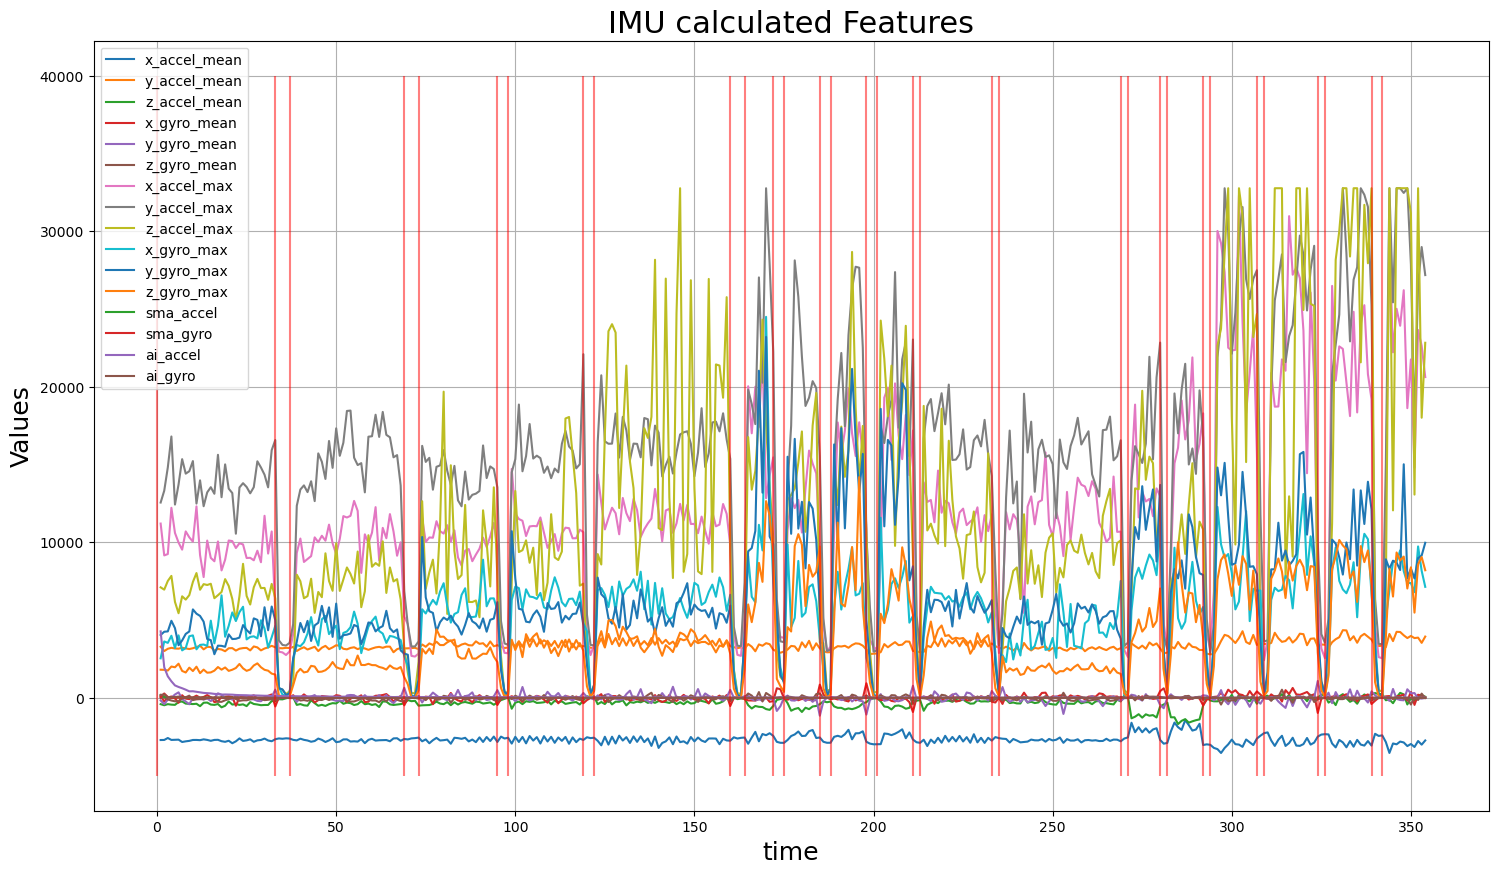

In [71]:
# Since the time steps can change depending on if we want 1, 2, 3, etc second itervals to calculate
# our features over, we have to make sure the activity transitions move with the time steps, below
# is a loop that creates a list of activity transitions depending on the value in the data series
activity_markers = [0]
# Set a variable to keep track of the current activity we are up to
current_label = imu_features["target"][0]
# iterate through all rows of the target labels, ie "walking", "jogging", etc
for row in range(len(imu_features["target"])):
    # if the current activity isnt the same as the target row, append the value to the list and 
    
    if current_label != imu_features["target"][row]:
        activity_markers.append(row)
        # change the current activity to the freshly added value to our list
        current_label = imu_features["target"][row]

# plot the new dataframe with the calculated features and add the vertical lines from the activity series to check it lines up
plot_dataframe(imu_features["time"], imu_features.drop(["target", "time"], axis=1), "IMU calculated Features")

# Plot the vertical lines associated with our activity transitions
plt.vlines(activity_markers, -5000,40000, color="r", alpha=0.5)
plt.show()

Ok so from the above plot we can now see that we were successfully able to transform our data from raw values into a set of features to be used <br>
for classfication. We chose to use the mean, max, signal magnitude, and average intensity values only for each axis. The thought process behind <br>
leaving the minimum out of the set was alot of the data does seem to have similiar minimum values, whereas with the maximum, each activity gives <br>
a very unique max intensity, therefore it was concluded that minimum might not play a big factor in the classification process and was left on the <br>
table. 



## Apply a machine learning workflow to train classifiers

Now that we have all of our data processed, features assigned, datasets aligned into one, we are finally ready for classification. But before we <br>
start training algorithms, we must first transform our labels to a number system for the classifier to use, split up our data in to test and training <br>
sets as well as scale our values.

In [455]:
# Assign our target values to a new variable
labels = imu_features.target

# Create a label encoder object to encode our string values into integers
lb = LabelEncoder()
# Fit the encoder
labels = lb.fit_transform(labels)

# Sanity check the labels
# lb.classes_
# ceck it worked
# labels

In [457]:
# Create our test train splits
X_train, X_test, y_train, y_test = train_test_split(imu_features.drop(["time", "target"],axis=1), labels, test_size=0.3, random_state=42)

# Convert the x values from dataframes to numpy arrays
X_train = X_train.values
X_test = X_test.values
# X_train

In [461]:
# Scale our data for classification use 
def scale_data(dataset):
    scaler = StandardScaler()
    return scaler.fit_transform(dataset.astype(np.float64))

X_train = scale_data(X_train)
X_test = scale_data(X_test)

### Functions for classification models

#### Performance Metrics

In [735]:
# A function to help calculate a set of performance metrics for multiple classifiers 

def performance_metrics(classifiers, X_test, y_test):
    """
    
    """
    # Some vanity printing
    print("Classifier\t\tAccuracy\tPrecision\tRecall\t\tF1 Score")
    print("_________________________________________________________________________________")

    # Iterate through every classifier in the classifiers list of tuples passed in and set the first variable
    # to the y_pred value and the second variable as the name, systematically go through each and calculate 
    # various performance metrics before adding the classifier to the confusion matrix plot.
    for clf in classifiers:
        # Set the classifiers variables
        y_pred = clf[0]
        name = clf[1]
        
        # Calculate metrics
        acc = round(accuracy_score(y_test, y_pred), 5)
        pre = round(precision_score(y_test, y_pred, average='macro', zero_division=False), 5)
        rec = round(recall_score(y_test, y_pred, average='macro'), 5)
        f1s = round(f1_score(y_test, y_pred, average='macro'), 5)

        # Print fancy looking metrics
        print(f"{name}\t|\t{acc}\t|\t{pre}\t|\t{rec}\t|\t{f1s}")

        

#### Overfitting test

In [821]:
# a function to help guess if a classifier is overfitting or not

def over_fit_test(classifiers, X_train, y_train, X_test):
    """
    Uses accuracy scores and cross validation to predict if a classifier
    is over fitting the data or not.
    """
    # set epsilon
    e = 0.05
    # Some vanity printing
    print("Classifier\t\tTrain set\tTest set\tOver/Under Fit")
    print("________________________________________________________________________")
    for clf in classifiers:
        classifier = clf[0]
        y_pred = clf[1]
        clf_name = clf[2]
        
        test_acc = accuracy_score(y_test, y_pred)
        
        # test_rmse = np.sqrt(test_rmse)
        
        scores = cross_val_score(classifier, X_train, y_train, scoring="accuracy", cv=10)
        # train_rmse = np.sqrt(-scores)

        train_acc = scores.mean()
        e = train_acc * 0.05
        if test_acc < train_acc - e:
            fit = "Overfit"
        elif abs(test_acc - train_acc) <= e:
            fit = "Good"
        else:
            fit = "undefined"
        
        print(f"{clf_name}\t\t{round(train_acc,4)}\t\t{round(test_acc,4)}\t\t{fit}")

#### Plot Confusion Matrix's

In [415]:
def plot_confusion_matrix(classifiers, X_test, y_test):
    # Determine how many rows and columns are needed to plot all of the confusion matrix's
    num_of_classifiers = len(classifiers)
    # if the nuber of classifiers / 2 leaves a remainder then add 1 for the amount of rows, otherwise, the number
    # of classifiers divide 2 is the perfect amount of rows
    if num_of_classifiers % 3 == 0:
        rows = int(num_of_classifiers / 3)
    else:
        rows = int(num_of_classifiers / 3) +1
     # subplots doesn't take '0' as a value, so make column = 2 if the num of classifiers is > 1 else columns can be 1
    columns = 1 if num_of_classifiers == 1 else 2 if num_of_classifiers == 2 else 3
    
    fig, ax = plt.subplots(rows, columns, figsize=(columns*8, rows*8))
    
    # creating variables to iterate through ax's from the figure to plot the confusion matrix's
    col = 0
    row = 0

    for clf in classifiers:
        # Set the classifiers variables
        y_pred = clf[0]
        name = clf[1]
        # Create a confusion matrix for the specific classifier and add the title
        ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=lb.classes_, ax=ax[row][col])
        ax[row][col].set_title(f"{name}'s confusion Matrix")

        # iterate the columns value by 1
        col +=1

        # if the columns = 1 then we have to increment the row by 1 and reset the column for the next row of
        # the subplots plot.
        if col <= columns - 1:
            continue
        else: 
            row += 1
            col = 0

#### Cross validation feature selection

In [417]:
def feature_selection(classifier, X_values, y_values, name):
    """
    
    """
    print(f"{name}'s Feature selection:")
    
    # Set the variables we will need to distinguish which features are the best for modeling 
    best_f1 = 0
    best_f2 = 0
    best_score = 0
    
    # A nested for loop to interate through all combinations of feautures in our data set 
    # it sends each combination to a function which will determine the most accurate 
    # selection of two features to use in our model
    for feature_1 in range(len(X_values[0])):
        for feature_2 in range(len(X_values[0])):
            # if the features are the same as one another, skip them.
            if feature_1 == feature_2:
                continue

            # Fit our classifier with our two chosen features 
            clf = classifier.fit(X_values[:, [feature_1, feature_2]], y_values)

            # Calculate the predictions our model makes on n number of folds (5 for us here)
            y_values_pred = cross_val_predict(clf, X_values[:, [feature_1, feature_2]], y_values, cv=5)

            # Get a hold of the f1_score for comparison 
            f_score = f1_score(y_values, y_values_pred, average="macro")
            
            # Control structure for determining the highest f1 scores and best trained model
            # if the score return is > the current best score, then rewrite the variables to
            # the new values
            if float(f_score) > best_score:
                best_score = f_score
                best_f1 = feature_1
                best_f2 = feature_2
                final_clf = clf
    
                # Print out a viualization of each combination that was better than the last
                print(f"First Feature: {best_f1}\tSecond Feature: {best_f2}\tF1 score: {best_score}")
    
    print("\n*******************************************************************************")
    return classifier.fit(X_values[:, [best_f1, best_f2]], y_values), best_f1, best_f2

### Training our Classifiers

#### Selecting features for our non ensemble classifiers

In [879]:
# Training a Support Vector  Classifier
svc = SVC()
svc_clf, svc_best_f1, svc_best_f2 = feature_selection(svc, X_train, y_train, "SVClassifier")
svc_clf_pred = svc_clf.predict(X_test[:, [svc_best_f1, svc_best_f2]])

# Training a K nearest Neighbours classifier
knn = KNeighborsClassifier()
knn_clf, knn_best_f1, knn_best_f2 = feature_selection(knn, X_train, y_train, "KNNeighbours")
knn_clf_pred = knn_clf.predict(X_test[:, [knn_best_f1, knn_best_f2]])

# Training a Stochastic Gradient decent classifier
sgd = SGDClassifier(random_state=42)
sgd_clf, sgd_best_f1, sgd_best_f2 = feature_selection(sgd, X_train, y_train, "SGDClassifier")
sgd_clf_pred = sgd_clf.predict(X_test[:, [sgd_best_f1, sgd_best_f2]])

SVClassifier's Feature selection:
First Feature: 0	Second Feature: 1	F1 score: 0.6134703654653606
First Feature: 0	Second Feature: 2	F1 score: 0.679864963196378
First Feature: 0	Second Feature: 6	F1 score: 0.7891190189459827
First Feature: 0	Second Feature: 10	F1 score: 0.8250153298994359
First Feature: 0	Second Feature: 11	F1 score: 0.8542058823666728
First Feature: 1	Second Feature: 10	F1 score: 0.8543423462604218
First Feature: 1	Second Feature: 11	F1 score: 0.8570528700682271
First Feature: 2	Second Feature: 11	F1 score: 0.8774577217239834

*******************************************************************************
KNNeighbours's Feature selection:
First Feature: 0	Second Feature: 1	F1 score: 0.6476541723117066
First Feature: 0	Second Feature: 2	F1 score: 0.701313856148904
First Feature: 0	Second Feature: 6	F1 score: 0.7468224624985773
First Feature: 0	Second Feature: 10	F1 score: 0.8164087845183736
First Feature: 0	Second Feature: 11	F1 score: 0.8664443368552958
First Feature:

#### Calculating performance scores for classifiers on default parameters

In [889]:
# Training a random forest classifier
rnd = RandomForestClassifier(n_estimators=100, max_depth=None, max_leaf_nodes=None)
rnd_clf = rnd.fit(X_train, y_train)
rnd_clf_pred = rnd_clf.predict(X_test)

# Training and adaptive boost classifier
ada = AdaBoostClassifier()
ada_clf = ada.fit(X_train, y_train)
ada_clf_pred = ada_clf.predict(X_test)

# Training gradient boost classifier
gbc = GradientBoostingClassifier()
gbc_clf = gbc.fit(X_train, y_train)
gbc_clf_pred = gbc_clf.predict(X_test)

# Create a list of all classifier's predicition scores and their names
classifier_list = [(rnd_clf_pred, "RandomForest"), (ada_clf_pred, "AdaBoost"), (gbc_clf_pred, "GradientBoost"), 
                   (svc_clf_pred, "SVClassifier"), (knn_clf_pred, "KNNClassifier"), (sgd_clf_pred, "SGDClassifier")]

# call the performance metrics method, passing in the list of classifiers and the x and y test values
performance_metrics(classifier_list, X_test, y_test)

Classifier		Accuracy	Precision	Recall		F1 Score
_________________________________________________________________________________
RandomForest	|	0.93458	|	0.95207	|	0.94669	|	0.94661
AdaBoost	|	0.59813	|	0.62433	|	0.6088	|	0.53237
GradientBoost	|	0.91589	|	0.92805	|	0.94105	|	0.92931
SVClassifier	|	0.88785	|	0.93205	|	0.9027	|	0.90995
KNNClassifier	|	0.88785	|	0.93041	|	0.8869	|	0.90151
SGDClassifier	|	0.68224	|	0.66503	|	0.74255	|	0.68755


Talk about the metrics and what is happening with each classifier

#### Using Cross validation with accuracy Scores to guesstimate if our classifiers are over fitting or not overfitting.

In [890]:
# Create a new list of tuples with 
classifier_list = [(rnd_clf, rnd_clf_pred,"RandomForest"), (ada_clf, ada_clf_pred,"AdaBoost"), (gbc_clf, gbc_clf_pred,"GradientBoost"), 
                   (svc_clf, svc_clf_pred,"SVClassifier"), (knn_clf, knn_clf_pred,"KNNClassifier"), (sgd_clf, sgd_clf_pred,"SGDClassifier")]

over_fit_test(classifier_list, X_train, y_train, X_test)

Classifier		Train set	Test set	Over/Under Fit
________________________________________________________________________
RandomForest		0.9477		0.9346		Good
AdaBoost		0.6878		0.5981		Overfit
GradientBoost		0.9437		0.9159		Good
SVClassifier		0.9435		0.8879		Overfit
KNNClassifier		0.9232		0.8879		Good
SGDClassifier		0.8785		0.6822		Overfit


In [ ]:
# Visualizing hyperparameter optimization

# values = [x for x in range(1, 200)]
# train_scores = []
# test_scores = []

# for x in values:
#     rnd = RandomForestClassifier(n_estimators=x)
#     rnd_clf = rnd.fit(X_train, y_train)
#     train_pred = rnd_clf.predict(X_train)
#     train_acc = accuracy_score(y_train, train_pred)
#     train_scores.append(train_acc)

#     test_pred = rnd_clf.predict(X_test)
#     test_acc = accuracy_score(y_test, test_pred)
#     test_scores.append(test_acc)

# plt.plot(values, train_scores, "-o", label="Train")
# plt.plot(values, test_scores, "-o", label="Test")
# plt.legend()

# values = [x for x in range(1, 240)]
# train_scores = []
# test_scores = []

# for x in values:
#     knn = KNeighborsClassifier(n_neighbors=x)
#     knn_clf = knn.fit(X_train[:, [knn_best_f1, knn_best_f2]],y_train)
#     train_pred = knn_clf.predict(X_train[:, [knn_best_f1, knn_best_f2]])
#     train_acc = accuracy_score(y_train, train_pred)
#     train_scores.append(train_acc)

#     test_pred = knn_clf.predict(X_test[:, [knn_best_f1, knn_best_f2]])
#     test_acc = accuracy_score(y_test, test_pred)
#     test_scores.append(test_acc)

# plt.plot(values, train_scores, "-o", label="Train")
# plt.plot(values, test_scores, "-o", label="Test")
# plt.legend()



Talk about which classifiers are ok and which ones are overfit or perhaps underfitting?

### Visualization of Basic training results

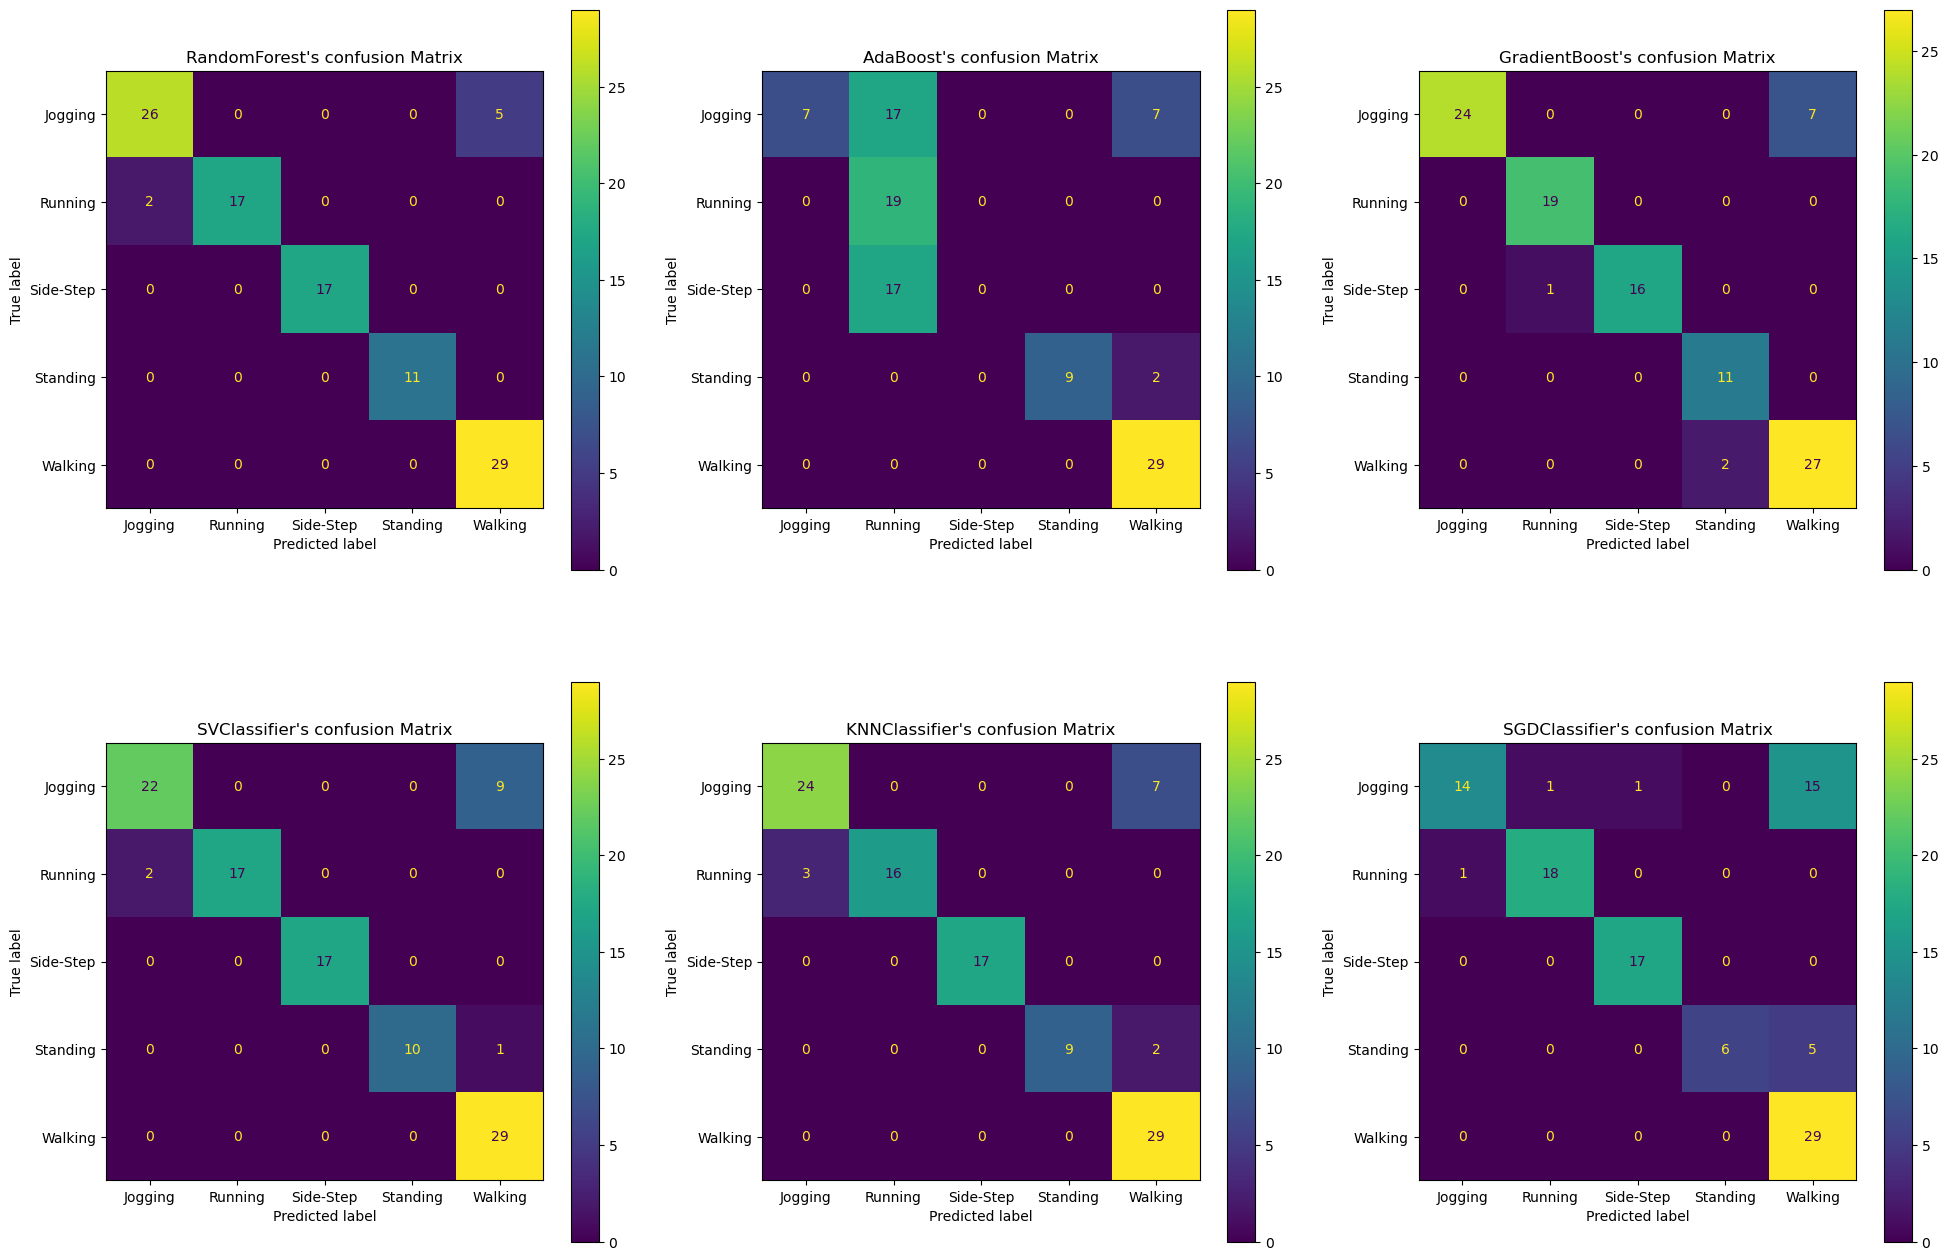

In [487]:
plot_confusion_matrix(classifier_list, X_test, y_test)

Talk about the featurue decisions, the scores, the matrixs

I wanted to implement a voting classifier to tie all the classifiers together, but after looking at the scores from the above 6 classifier's, it is very clear that a voting classifier <br>
will not outscore the RandomForestClassifier. This is due to the fact that it will weigh all of the classifier's in the list, and most of them are at least 5 to 10% worse than the RandomTree, <br>
but also the SGD is so bad that it alone will bring down the voting classifier. For these reasons I chose not to use it as one of the classifiers for this project.

## Re-Training our classifiers with hyper-parameter optimization

### Select Hyper parameters

0

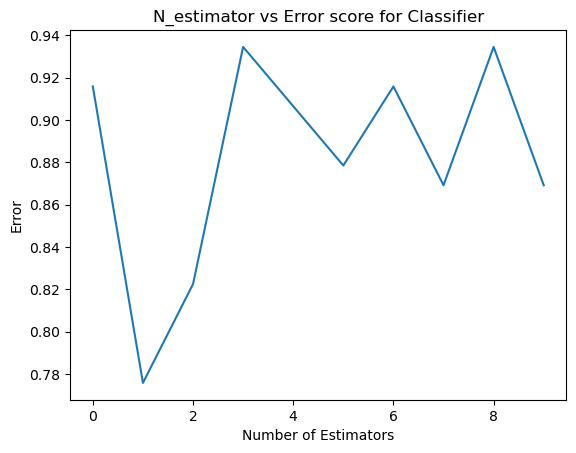

In [867]:

def optimal_n_estimator(classifier, estimators, X_train, y_train, X_test, y_test):
    """
    Calculates the best number of estimators to use for a given classifier
    and plots the error for estimator outcomes
    """
    
    errors = []
    min_error = float("inf")
    time_since_change = 0
    best_estimator = 0 
    for n_estimators in range(1, estimators):

        classifier.n_estimators = n_estimators
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        error = mean_squared_error(y_test, y_pred)
        errors.append(error)
        
        if error < min_error:
            min_error = error
            time_since_change = 0
            best_estimator = n_estimators
        else:
            time_since_change += 1
            if time_since_change == 10:
                break
    
    plt.plot(np.arange(0, len(errors), 1), errors)
    plt.title("N_estimator vs Error score for Classifier")
    plt.xlabel("Number of Estimators")
    plt.ylabel("Error")

    return best_estimator


estimators = 1000
rnd = RandomForestClassifier(n_estimators = estimators, max_depth = 8)
# ada = AdaBoostClassifier(n_estimators=estimators)

num_of_estimators = optimal_n_estimator(rnd, estimators, X_train, y_train, X_test, y_test)
num_of_estimators

In [891]:

def grid(clf, X, y):
    """
    Uses GridSearchCV to hunt for hyper paramters
    """
    
    classifiers = []
    for c in clf:
        clf = c[0]
        params = c[1]
        name = c[2]
        grid_search = GridSearchCV(clf, params, cv=5, scoring="neg_mean_squared_error", return_train_score=True)
        
        classifiers.append(grid_search.fit(X, y))
        print(name, grid_search.best_params_)
    return classifiers
    
rnd = RandomForestClassifier()
ada = AdaBoostClassifier()
gbc = GradientBoostingClassifier()

rnd_params = [{"n_estimators": [10, 100, 1000], "max_depth": [4, 8, 16]}]
ada_params = [{"n_estimators": [10, 100, 1000], "learning_rate": [0.1, 1, 10]}]
gbc_params = [{"n_estimators": [10, 100, 1000], "learning_rate": [0.1, 1, 10]}]

clfs = [(rnd, rnd_params, "rnd"), (ada, ada_params, "ada"), (gbc, gbc_params, "gbc")]

rnd_clf, ada_clf, gbc_clf = grid(clfs, X_train, y_train)

rnd {'max_depth': 8, 'n_estimators': 10}
ada {'learning_rate': 0.1, 'n_estimators': 1000}
gbc {'learning_rate': 0.1, 'n_estimators': 100}


### Retrain Classifiers with hyperparameters

In [901]:
# Training a random forest classifier
rnd = RandomForestClassifier(n_estimators = 10, max_depth = 8)
rnd_clf = rnd.fit(X_train, y_train)
rnd_clf_pred = rnd_clf.predict(X_test)

# Training and adaptive boost classifier
ada = AdaBoostClassifier(n_estimators = 1000, learning_rate= 0.1)
ada_clf = ada.fit(X_train, y_train)
ada_clf_pred = ada_clf.predict(X_test)

# Training gradient boost classifier
gbc = GradientBoostingClassifier(n_estimators = 100, learning_rate= 0.1)
gbc_clf = gbc.fit(X_train, y_train)
gbc_clf_pred = gbc_clf.predict(X_test)

# Create a list of all classifier's predicition scores and their names
classifier_list = [(rnd_clf_pred, "RandomForest"), (ada_clf_pred, "AdaBoost"), (gbc_clf_pred, "GradientBoost"), 
                   (svc_clf_pred, "SVClassifier"), (knn_clf_pred, "KNNClassifier"), (sgd_clf_pred, "SGDClassifier")]

# call the performance metrics method, passing in the list of classifiers and the x and y test values
performance_metrics(classifier_list, X_test, y_test)

Classifier		Accuracy	Precision	Recall		F1 Score
_________________________________________________________________________________
RandomForest	|	0.93458	|	0.95036	|	0.94669	|	0.94654
AdaBoost	|	0.65421	|	0.74762	|	0.64148	|	0.64775
GradientBoost	|	0.90654	|	0.91805	|	0.92928	|	0.91812
SVClassifier	|	0.88785	|	0.93205	|	0.9027	|	0.90995
KNNClassifier	|	0.88785	|	0.93041	|	0.8869	|	0.90151
SGDClassifier	|	0.68224	|	0.66503	|	0.74255	|	0.68755


In [903]:
# Create a new list of tuples with 
classifier_list = [(rnd_clf, rnd_clf_pred,"RandomForest"), (ada_clf, ada_clf_pred,"AdaBoost"), (gbc_clf, gbc_clf_pred,"GradientBoost"), 
                   (svc_clf, svc_clf_pred,"SVClassifier"), (knn_clf, knn_clf_pred,"KNNClassifier"), (sgd_clf, sgd_clf_pred,"SGDClassifier")]

over_fit_test(classifier_list, X_train, y_train, X_test)

Classifier		Train set	Test set	Over/Under Fit
________________________________________________________________________
RandomForest		0.9188		0.9346		Good
AdaBoost		0.7615		0.6542		Overfit
GradientBoost		0.9477		0.9065		Good
SVClassifier		0.9435		0.8879		Overfit
KNNClassifier		0.9232		0.8879		Good
SGDClassifier		0.8785		0.6822		Overfit


### Calculate Error to determine Under/Over fitting

## Create visualizations for how the classifier's learnt 

In [113]:
# for name, score in zip(imu_features.columns.drop(["target", "time"]), rnd.feature_importances_):
#     print(name, score)

In [385]:
def decision_boundaries(classifiers, X_train, y_train, X_test, y_test, labels):
    """
    Takes in a given datasets train and test points and a classifier train on said points and 
    proceeds to create a plot of the boundaries learnt from the data during training. It then
    plots the testing points onto of the boundaries to better visualize the behaviour of the
    classifier.
    Params:
    List of tuples containing a classifier, it's name as well as it's best two trained features
    X_train - X set of data used to train a classifier
    y_train - y set of data used to train a classifier
    X_test - X set of data used to test a classifier
    y_test - y set of data used to test a classifier
    """
        # Determine how many rows and columns are needed to plot all of the confusion matrix's
    num_of_classifiers = len(classifiers)
    # if the nuber of classifiers / 2 leaves a remainder then add 1 for the amount of rows, otherwise, the number
    # of classifiers divide 2 is the perfect amount of rows
    if num_of_classifiers % 3 == 0:
        rows = int(num_of_classifiers / 3)
    else:
        rows = int(num_of_classifiers / 3) +1
     # subplots doesn't take '0' as a value, so make column = 2 if the num of classifiers is > 1 else columns can be 1
    columns = 1 if num_of_classifiers == 1 else 2 if num_of_classifiers == 2 else 3
    
    fig, ax = plt.subplots(rows, columns, figsize=(columns*8, rows*8))
    
    # creating variables to iterate through ax's from the figure to plot the confusion matrix's
    col = 0
    row = 0

    
    # set the distance between lines in our mesh plot of boundaries, essentially it will take
    # this distance of step up the plot starting from our min value to our max
    h = 1
    
    # Set our colours up for our mesh and test points, they will use the same colours so you can
    # see clearly where the points are and where the points should be
    the_colours = ListedColormap(["m", "c", "orange", "green", "b"])

     # Create a list of labels for our plots legend
    label = [i for i in labels.classes_]
    
    col = 0
    # Iterate through our classifiers and plot their decision boundaries
    for clf in classifiers:
        model = clf[0]
        best_f1 = clf[1]
        best_f2 = clf[2]
        name = clf[3]
        # Setting our min and max values of our plot, defining them from our training set values with
        # our two best features.
        x_min, x_max = X_train[:, best_f1].min() - 1, X_train[:, best_f1].max() + 1
        y_min, y_max = X_train[:, best_f2].min() - 1, X_train[:, best_f2].max() + 1
        
        # Create a list of coordinates for the x and y values for our decision boundaries
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
        
        # Finally reshaping the predicted values from our test labels
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        
        # Plot our mesh of decision boundaries
        ax[col].pcolormesh(xx, yy, Z, cmap=the_colours, alpha=0.5)
        
        # Optional training points plot
        # ax.scatter(X_train[:, best_f1], X_train[:, best_f2], c=y_train, cmap=the_colours, edgecolor = "k", s = 20)
        
        # Plot the test data points
        scatter = ax[col].scatter(X_test[:, best_f1], X_test[:, best_f2], c=y_test, cmap=the_colours, edgecolor = "k", s = 50)
        
        # Jazz up the plot
        ax[col].set_title(f"{name} 4-class Classification (Plant dataset)", fontsize=16)
        ax[col].set_xlim(xx.min(), xx.max())
        ax[col].set_ylim(yy.min(), yy.max())
        ax[col].legend(handles = scatter.legend_elements()[0], labels = label)

        col +=1

        if col <= columns - 1:
            continue
        else: 
            row += 1
            col = 0

In [387]:
# rnd = RandomForestClassifier(n_jobs=-1)
# rnd = rnd.fit(X_train, y_train)
# for name, score in zip(imu_features.columns.drop(["target", "time"]), rnd.feature_importances_):
#     print(name, score)

# # Re-training a Stochastic Gradient decent classifier

# rnd_clf = rnd.fit(X_train[:, [10, 11]], y_train)
# rnd_clf, rnd_best_f1, rnd_best_f2 = feature_selection(rnd, X_train, y_train, "rndClassifier")
# rnd_clf_pred = rnd_clf.predict(X_test[:, [rnd_best_f1, rnd_best_f2]])
lb.classes_

array(['Jogging', 'Running', 'Side-Step', 'Standing', 'Walking'],
      dtype=object)

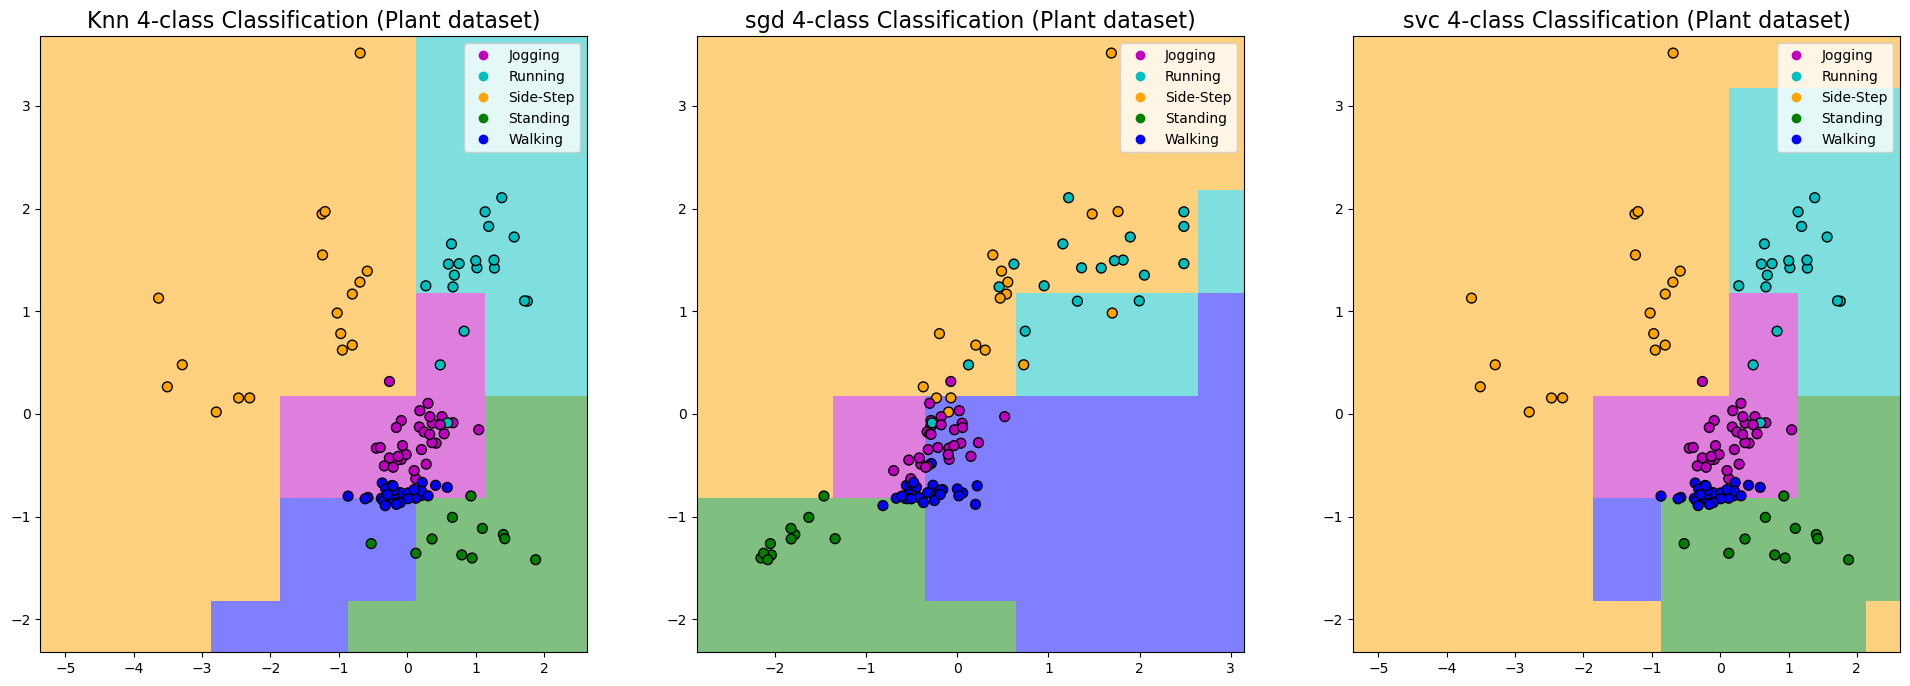

In [389]:
classifiers = [(knn_clf, knn_best_f1, knn_best_f2, "Knn"), (sgd_clf, sgd_best_f1, sgd_best_f2, "sgd"), (svc_clf, svc_best_f1, svc_best_f2, "svc")]

decision_boundaries(classifiers, X_train, y_train, X_test, y_test, lb)

## Conclude and summerise what was learnt

In [104]:
voting = VotingClassifier(estimators = [("rnd", rnd_clf), ("ada", ada_clf), ("knn", knn_clf), ("gbc", gbc_clf)], voting="hard")

vote_clf = voting.fit(X_train, y_train)

y_pred = voting.predict(X_test)
accuracy_score(y_test, y_pred)
# classifiers_performance_metrics((y_pred,"VotingClassifier"), X_test, y_test )

0.9532710280373832